### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np

# Accessing CSV files

In [2]:
import pandas as pd

# Caminhos dos arquivos CSV
train_metadata_path = '/workspace/aimsbirdclef/input/birdclef-2024/train_metadata.csv'
sample_submission_path = '/workspace/aimsbirdclef/input/birdclef-2024/sample_submission.csv'
eBird_taxonomy_path = '/workspace/aimsbirdclef/input/birdclef-2024/eBird_Taxonomy_v2021.csv'

# Carregar os arquivos CSV em DataFrames
train_metadata_df = pd.read_csv(train_metadata_path)
sample_submission_df = pd.read_csv(sample_submission_path)
eBird_taxonomy_df = pd.read_csv(eBird_taxonomy_path)

In [3]:
train_metadata_df

primary_label secondary_labels      type  latitude  longitude  \
0            asbfly               []  ['call']   39.2297   118.1987   
1            asbfly               []  ['song']   51.4030   104.6401   
2            asbfly               []  ['song']   36.3319   127.3555   
3            asbfly               []  ['call']   21.1697    70.6005   
4            asbfly               []  ['call']   15.5442    73.7733   
...             ...              ...       ...       ...        ...   
24454       zitcis1               []      ['']   43.5925     4.5434   
24455       zitcis1               []      ['']   43.5925     4.5434   
24456       zitcis1               []      ['']   51.1207     4.5607   
24457       zitcis1               []      ['']   41.5607    -8.4236   
24458       zitcis1               []      ['']   13.7747   100.8919   

          scientific_name             common_name  \
0      Muscicapa dauurica  Asian Brown Flycatcher   
1      Muscicapa dauurica  Asian Brown Flycatcher   
2      Muscicapa dauurica  Asian Brown Flycatcher   
3      Muscicapa dauurica  Asian Brown Flycatcher   
4      Muscicapa dauurica  Asian Brown Flycatcher   
...                   ...                     ...   
24454  Cisticola juncidis       Zitting Cisticola   
24455  Cisticola juncidis       Zitting Cisticola   
24456  Cisticola juncidis       Zitting Cisticola   
24457  Cisticola juncidis       Zitting Cisticola   
24458  Cisticola juncidis       Zitting Cisticola   

                                  author  \
0                         Matt Slaymaker   
1                       Magnus Hellström   
2                          Stuart Fisher   
3                              vir joshi   
4      Albert Lastukhin & Sergei Karpeev   
...                                  ...   
24454                  Chèvremont Fabian   
24455                  Chèvremont Fabian   
24456                         Wim Jacobs   
24457                       Jorge Leitão   
24458                         Sam Hambly   

                                                 license  rating  \
0      Creative Commons Attribution-NonCommercial-Sha...     5.0   
1      Creative Commons Attribution-NonCommercial-Sha...     2.5   
2      Creative Commons Attribution-NonCommercial-Sha...     2.5   
3      Creative Commons Attribution-NonCommercial-Sha...     4.0   
4      Creative Commons Attribution-NonCommercial-Sha...     4.0   
...                                                  ...     ...   
24454  Creative Commons Attribution-NonCommercial-Sha...     5.0   
24455  Creative Commons Attribution-NonCommercial-Sha...     4.0   
24456  Creative Commons Attribution-NonCommercial-Sha...     4.0   
24457  Creative Commons Attribution-NonCommercial-Sha...     4.5   
24458  Creative Commons Attribution-NonCommercial-Sha...     5.0   

                                     url              filename  
0      https://www.xeno-canto.org/134896   asbfly/XC134896.ogg  
1      https://www.xeno-canto.org/164848   asbfly/XC164848.ogg  
2      https://www.xeno-canto.org/175797   asbfly/XC175797.ogg  
3      https://www.xeno-canto.org/207738   asbfly/XC207738.ogg  
4      https://www.xeno-canto.org/209218   asbfly/XC209218.ogg  
...                                  ...                   ...  
24454      https://xeno-canto.org/845747  zitcis1/XC845747.ogg  
24455      https://xeno-canto.org/845817  zitcis1/XC845817.ogg  
24456      https://xeno-canto.org/856176  zitcis1/XC856176.ogg  
24457      https://xeno-canto.org/856723  zitcis1/XC856723.ogg  
24458      https://xeno-canto.org/858550  zitcis1/XC858550.ogg  

[24459 rows x 12 columns]

In [4]:
sample_submission_df

row_id    asbfly   ashdro1   ashpri1   ashwoo2   asikoe2  \
0   soundscape_1446779_5  0.005495  0.005495  0.005495  0.005495  0.005495   
1  soundscape_1446779_10  0.005495  0.005495  0.005495  0.005495  0.005495   
2  soundscape_1446779_15  0.005495  0.005495  0.005495  0.005495  0.005495   

    asiope1   aspfly1   aspswi1   barfly1  ...   whbwoo2   whcbar1   whiter2  \
0  0.005495  0.005495  0.005495  0.005495  ...  0.005495  0.005495  0.005495   
1  0.005495  0.005495  0.005495  0.005495  ...  0.005495  0.005495  0.005495   
2  0.005495  0.005495  0.005495  0.005495  ...  0.005495  0.005495  0.005495   

     whrmun   whtkin2    woosan   wynlau1   yebbab1   yebbul3   zitcis1  
0  0.005495  0.005495  0.005495  0.005495  0.005495  0.005495  0.005495  
1  0.005495  0.005495  0.005495  0.005495  0.005495  0.005495  0.005495  
2  0.005495  0.005495  0.005495  0.005495  0.005495  0.005495  0.005495  

[3 rows x 183 columns]

In [5]:
eBird_taxonomy_df

TAXON_ORDER CATEGORY SPECIES_CODE         PRIMARY_COM_NAME  \
0                1  species      ostric2           Common Ostrich   
1                6  species      ostric3           Somali Ostrich   
2                7    slash       y00934    Common/Somali Ostrich   
3                8  species      grerhe1             Greater Rhea   
4               14  species      lesrhe2              Lesser Rhea   
...            ...      ...          ...                      ...   
16748        34694  species      slcgro1   Slate-colored Grosbeak   
16749        34697  species      bltgro2  Black-throated Grosbeak   
16750        34698     spuh      saltat1             saltator sp.   
16751        34699     spuh      passer1            passerine sp.   
16752        35000     spuh        bird1                 bird sp.   

                             SCI_NAME            ORDER1  \
0                    Struthio camelus  Struthioniformes   
1              Struthio molybdophanes  Struthioniformes   
2      Struthio camelus/molybdophanes  Struthioniformes   
3                      Rhea americana        Rheiformes   
4                        Rhea pennata        Rheiformes   
...                               ...               ...   
16748                Saltator grossus     Passeriformes   
16749            Saltator fuliginosus     Passeriformes   
16750                    Saltator sp.     Passeriformes   
16751               Passeriformes sp.     Passeriformes   
16752                        Aves sp.               NaN   

                                 FAMILY SPECIES_GROUP REPORT_AS  
0             Struthionidae (Ostriches)     Ostriches       NaN  
1             Struthionidae (Ostriches)           NaN       NaN  
2             Struthionidae (Ostriches)           NaN       NaN  
3                       Rheidae (Rheas)         Rheas       NaN  
4                       Rheidae (Rheas)           NaN       NaN  
...                                 ...           ...       ...  
16748  Thraupidae (Tanagers and Allies)           NaN       NaN  
16749  Thraupidae (Tanagers and Allies)           NaN       NaN  
16750  Thraupidae (Tanagers and Allies)           NaN       NaN  
16751                               NaN        Others       NaN  
16752                               NaN           NaN       NaN  

[16753 rows x 9 columns]

# Lendo audios

In [104]:
def get_audio_files(folder_path):
    """Obtém os caminhos dos arquivos de áudio .ogg na pasta especificada."""
    audio_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.ogg'):
                file_path = os.path.join(root, file)
                audio_files.append(file_path)
    return audio_files

def calculate_spectrograms(audio_files, center_audio=False, center_seconds=10):
    spectrograms = []
    
    for audio in audio_files:
        y, sr = librosa.load(audio, sr=None)
        
        if center_audio:
            num_samples_center = min(center_seconds * sr, len(y))  # Garante que não ultrapasse o tamanho do áudio
            start_sample = (len(y) - num_samples_center) // 2
            end_sample = start_sample + num_samples_center
            y_center = y[start_sample:end_sample]
            D_center = librosa.amplitude_to_db(librosa.stft(y_center), ref=np.max)
            spectrograms.append((y_center, sr, D_center))
        else:
            D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
            spectrograms.append((y, sr, D))
    
    return spectrograms

def plot_spectrograms(spectrograms, audio_files):
    """Plota os espectrogramas."""
    num_files = len(spectrograms)
    
    # Define o número de colunas e linhas para os subplots
    cols = 3
    rows = (num_files + 2) // cols
    
    plt.figure(figsize=(20, 5 * rows))
    
    for idx, (y, sr, D), audio_file in zip(range(1, num_files + 1), spectrograms, audio_files):
        plt.subplot(rows, cols, idx)
        
        # Plot do espectrograma
        img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        
        # Obtém o nome da amostra de áudio e o nome da pasta
        sample_name = os.path.basename(audio_file)
        folder_name = os.path.basename(os.path.dirname(audio_file))
        
        plt.title(f'{folder_name} - {sample_name.split(".")[0]}')
        plt.xlabel('Tempo (s)')
        plt.ylabel('Frequência (Hz)')
        
    plt.tight_layout()
    plt.show()


In [94]:
y, sr = librosa.load("/workspace/aimsbirdclef/input/birdclef-2024/train_audio/wynlau1/XC197252.ogg", sr=None)
print(y)
print(len(y)/sr)
print(sr)

[-3.7903790e-06  4.5045385e-07 -1.0247281e-06 ... -2.9950522e-04
 -6.1570812e-04 -4.3932823e-04]
103.26203125
32000


/tmp/ipykernel_91924/283053472.py:22: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D_center = librosa.amplitude_to_db(librosa.stft(y_center), ref=np.max)


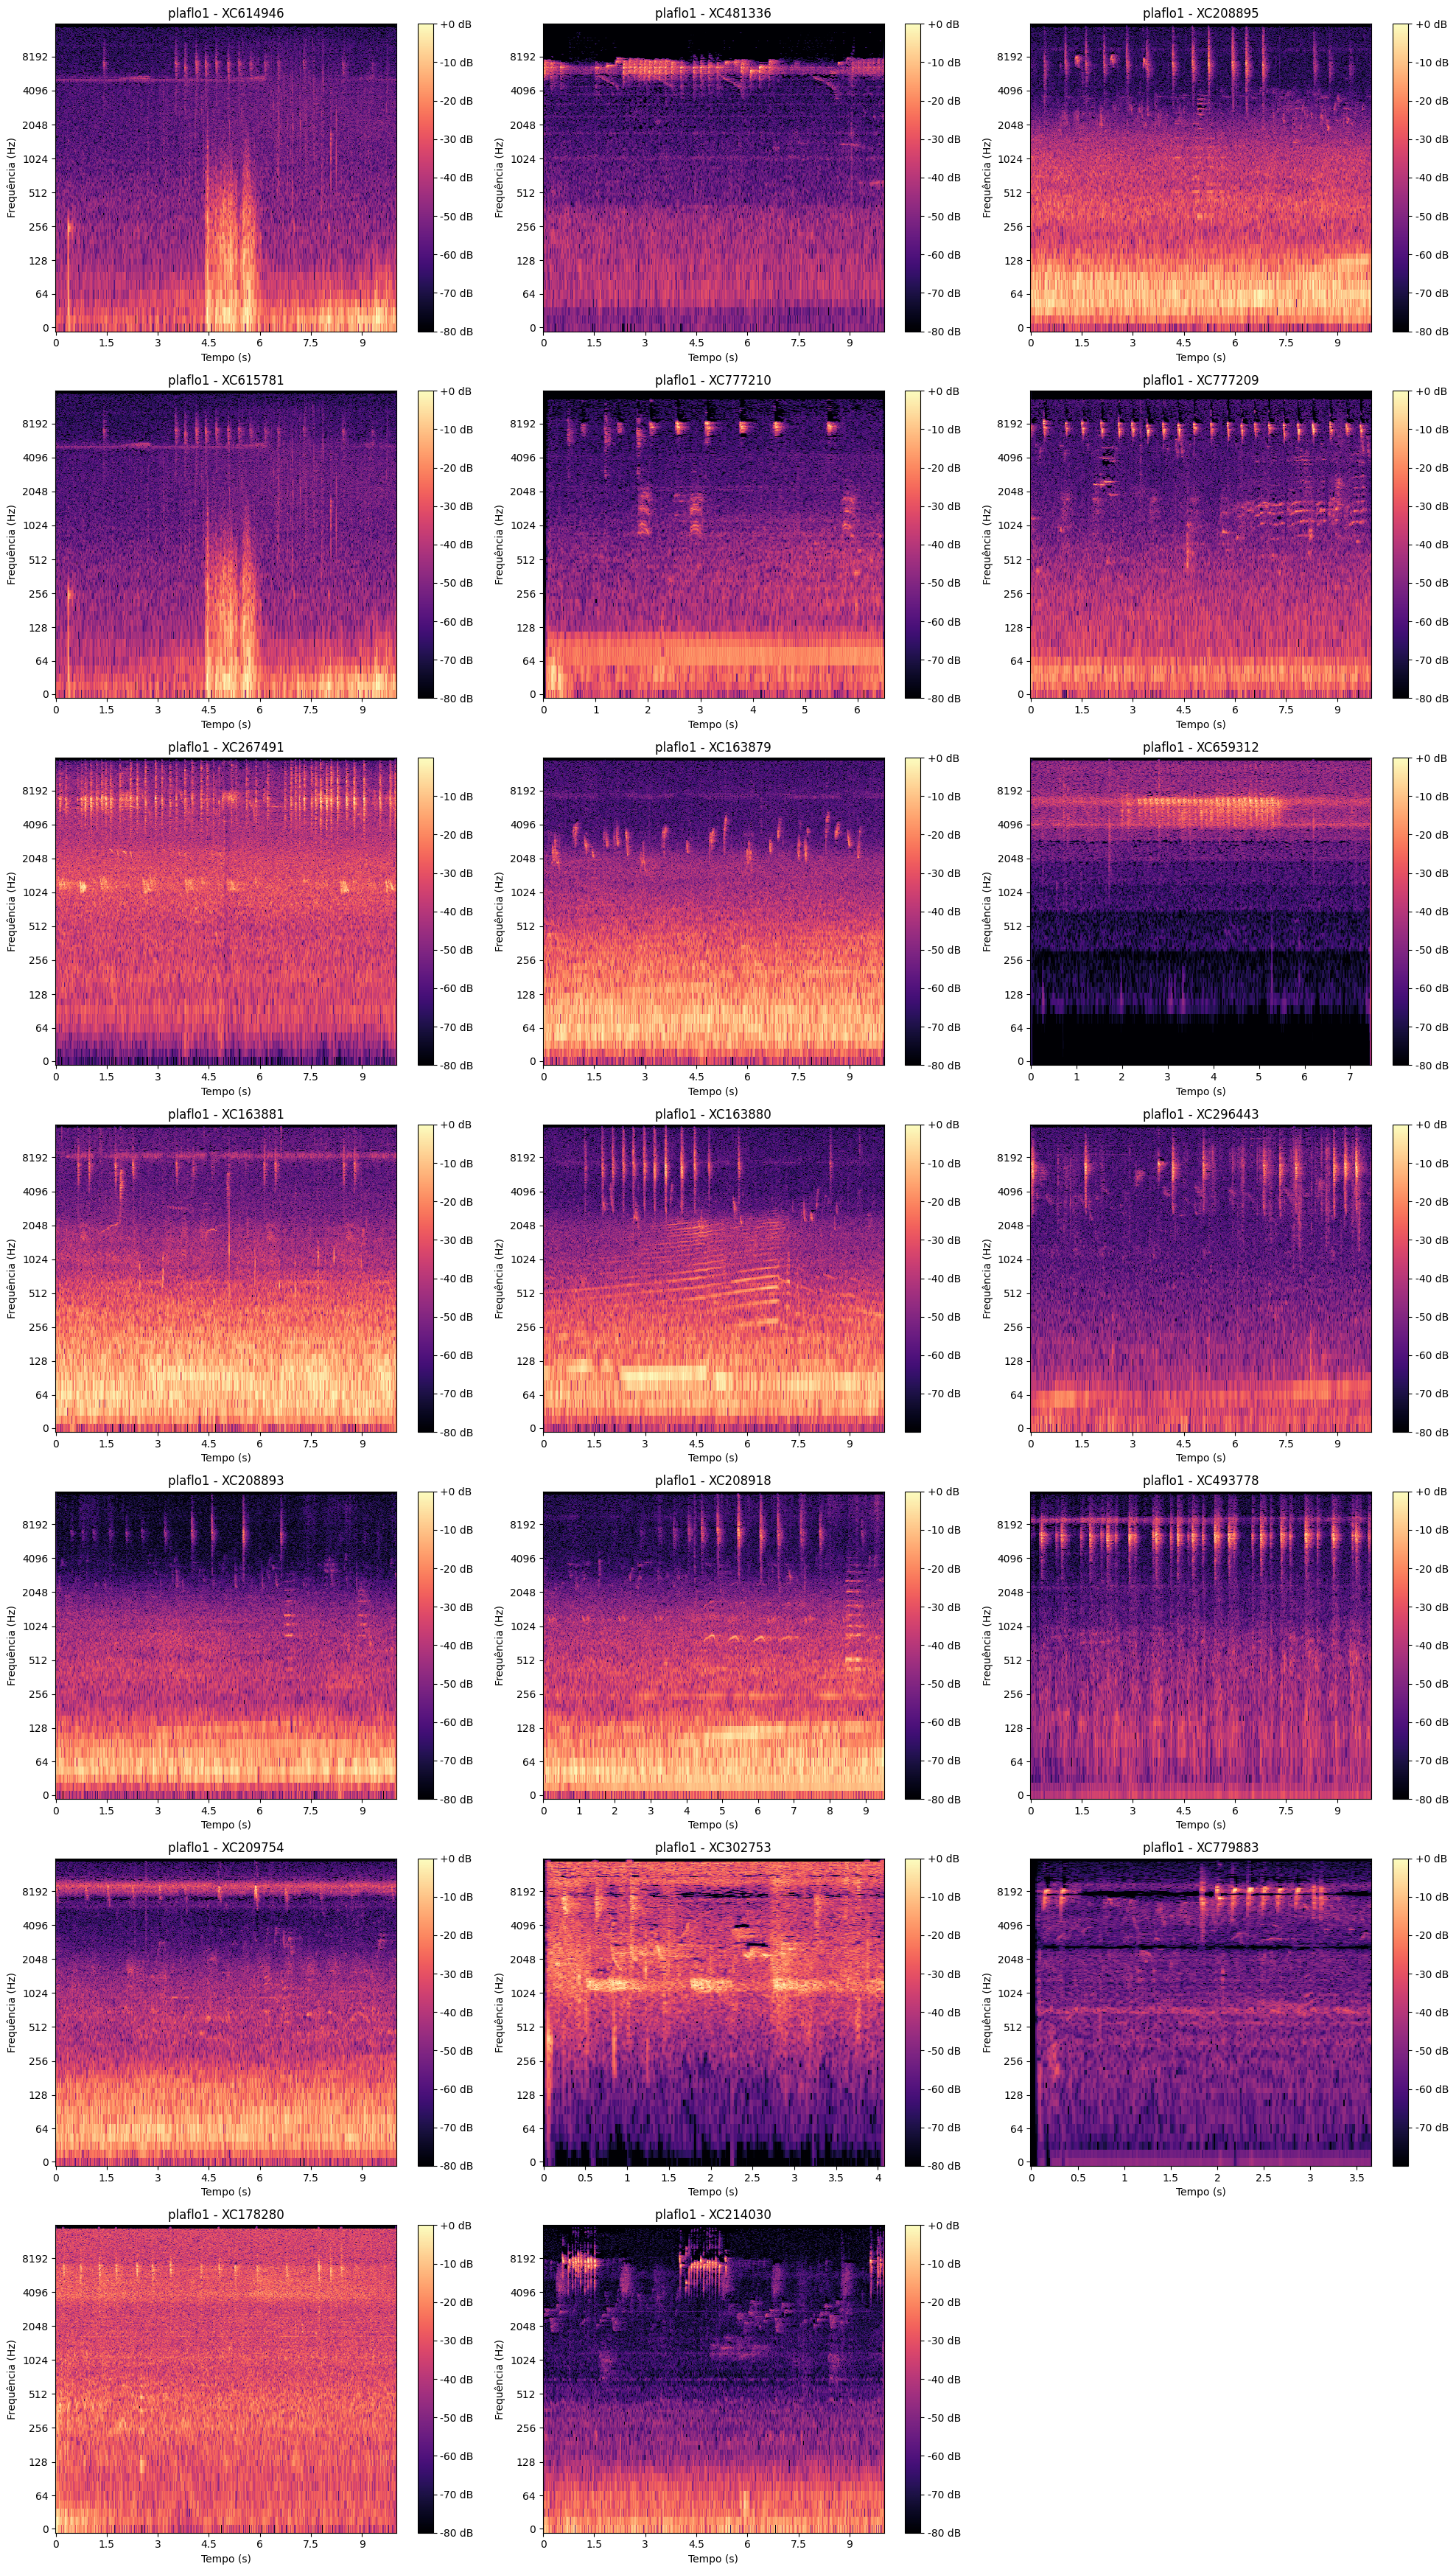

In [106]:
# Pasta dos áudios
folder_path = '/workspace/aimsbirdclef/input/birdclef-2024/train_audio/plaflo1'
 
# Obter os caminhos dos arquivos de áudio
audio_files = get_audio_files(folder_path)

# Calcular os espectrogramas
spectrograms = calculate_spectrograms(audio_files, center_audio = True)

# Plotar os espectrogramas
plot_spectrograms(spectrograms, audio_files)